**1. Importing libraries**

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import osclib

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

import sys
sys.path.append('/osclib/')

**2. Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [6]:
# xraypath = '/path/to/Henke/data/'
xraypath = '/Users/olgaridzel/Research/Bruce/PHYSDAT/opt/xray/'

**Examples**

**DNA**

In [10]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]

osc = osclib.Drude()
osc.name = 'DNA'
osc.composition = osclib.Composition(['c','n','o','p','h'], [39,13,24,4,49])
osc.alpha = 0
osc.eloss = osclib.linspace(machine_eps,100,0.1)
osc.q = 0
osc.Eg = 4.5
osc.vb = 0.5
osc.na = 0.087

AttributeError: module 'osclib' has no attribute 'Drude'

In [36]:
A = np.array([0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017])
gamma = np.array([3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91])
omega = np.array([11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97])

osc = osclib.DrudeLindhard()
osc.name = 'DNA'
osc.composition = osclib.Composition(['c','n','o','p','h'], [39,13,24,4,49])
osc.alpha = 0
osc.eloss = linspace(machine_eps,100,0.1)
osc.q = 0
osc.Eg = 4.5
osc.vb = 0.5
osc.na = 0.087

*Dielectric function*

<IPython.core.display.Javascript object>


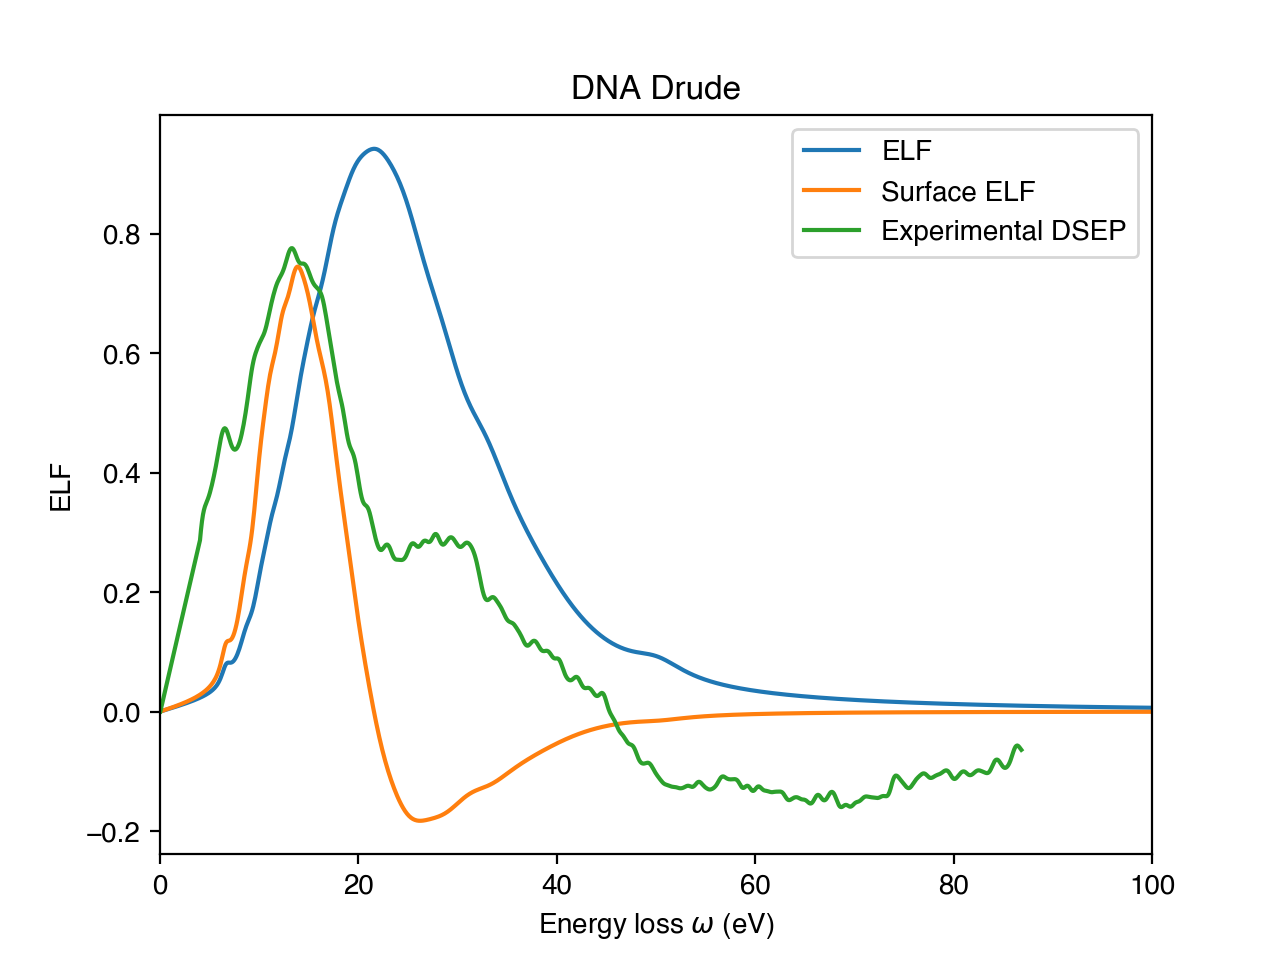

In [45]:
eps = eps_sum(oscParams)

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

plt.figure()
plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

*normalised DIIMFP*

<IPython.core.display.Javascript object>


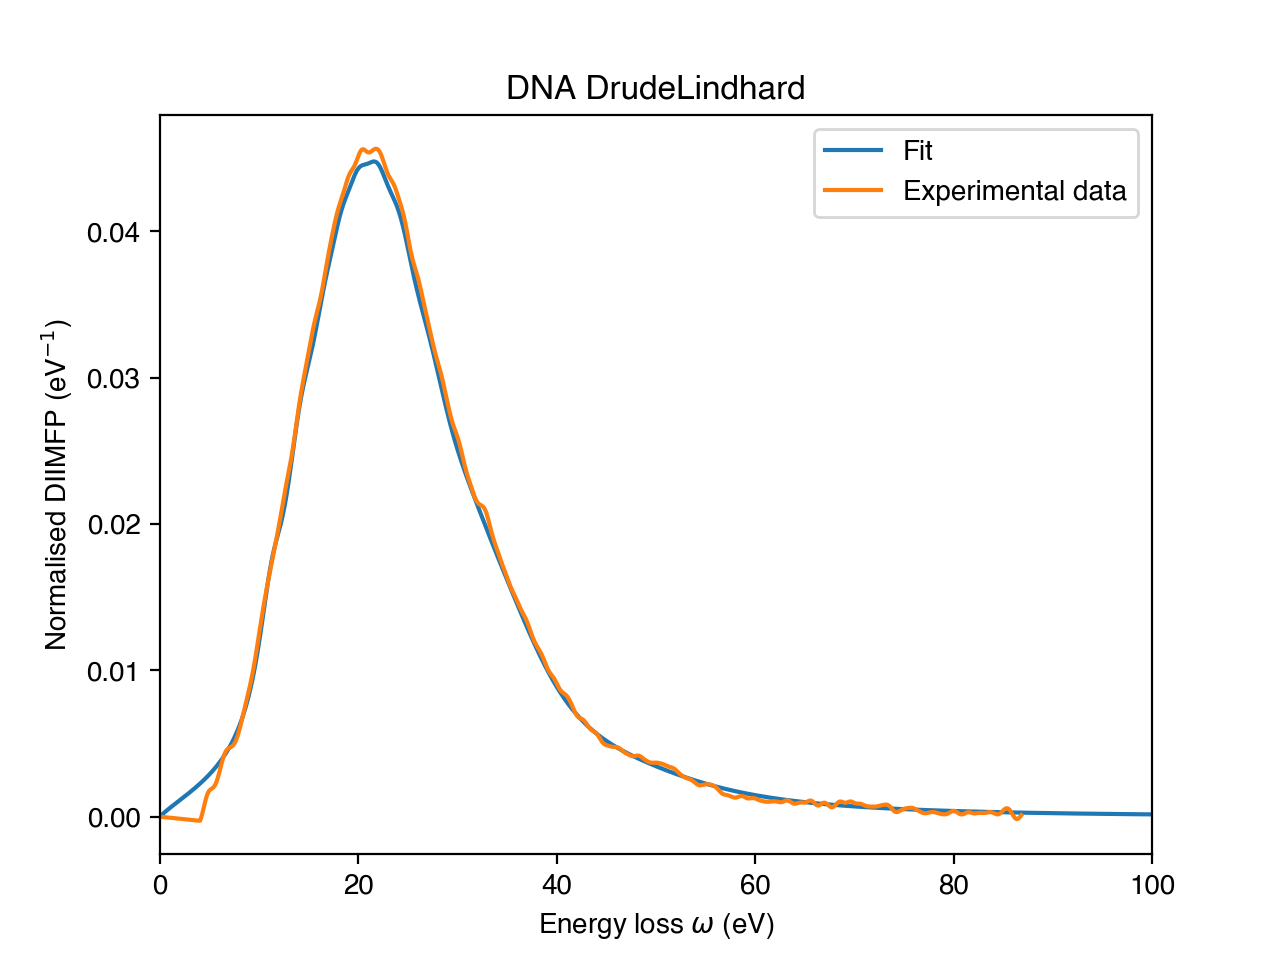

In [76]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

*IMFP*

<IPython.core.display.Javascript object>


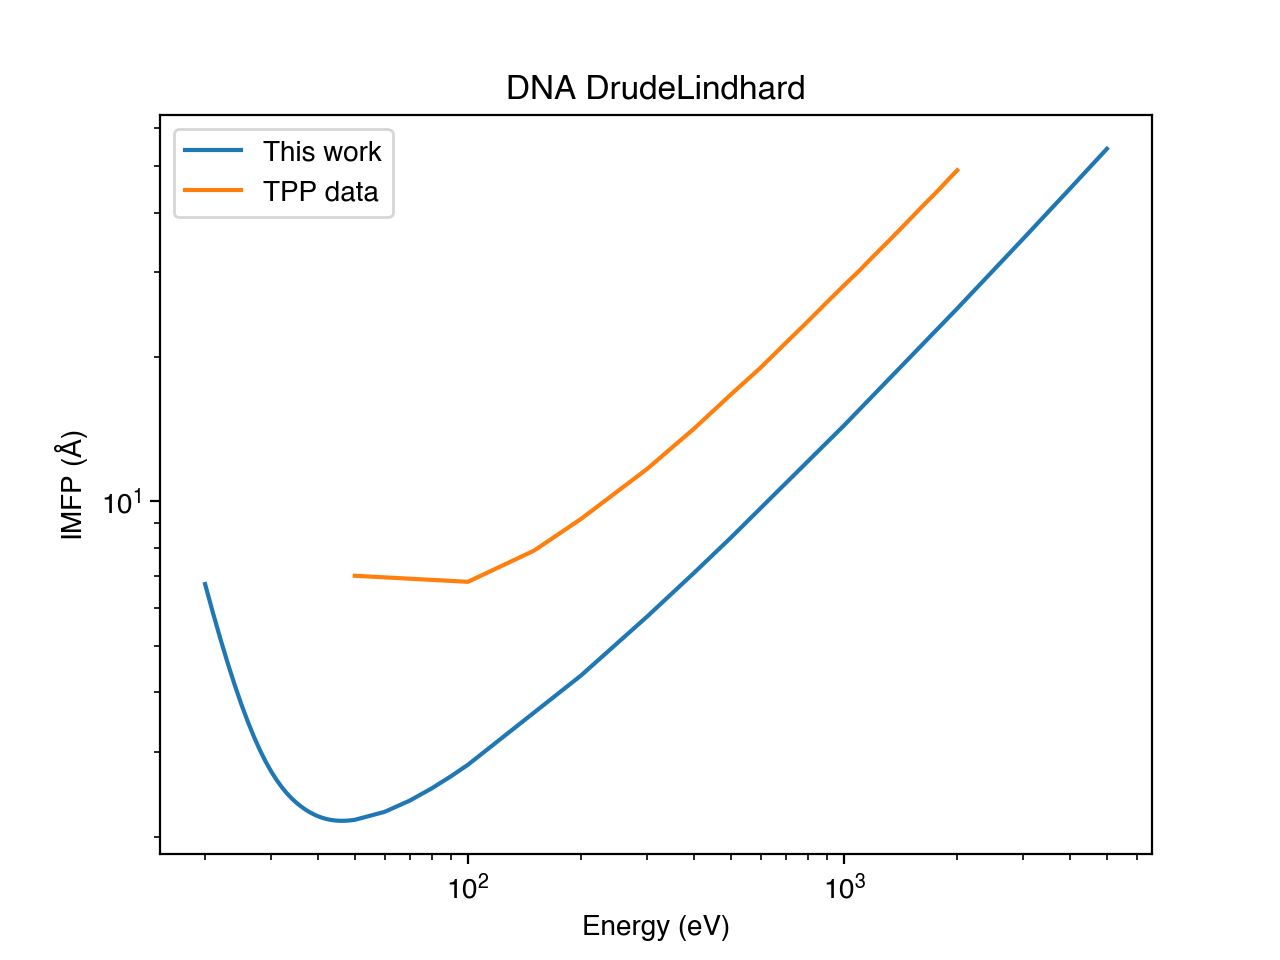

In [77]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.plot(tpp_data[:,0],tpp_data[:,5],label='TPP data')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

**Irganox**

In [13]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'Irganox'
oscParams.composition = {'element': ['c','o','h'], 'index': [73,12,108]}
oscParams.A = np.array([4.19,16.58,32.18,55.48,35.05,9.03,21.51,25.32,29.22,11.87,34.75,30.35,30.16,30.86,16.16])
oscParams.omega = np.array([6.2,9.6,11.4,13.6,16.2,18.3,19.7,22.0,25.4,30.0,30.6,38.0,46.6,56.7,72.9])
oscParams.gamma = np.array([0.7,2.3,3.3,4.1,4.2,3.2,5.3,6.2,8.0,14.5,11.5,13.7,14.3,16.5,14.0])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 5.4
oscParams.vb = 10
oscParams.na = 0.113

In [40]:
oscParams = Osc()
oscParams.model = 'DrudeLindhard'
oscParams.name = 'Irganox'
oscParams.composition = {'element': ['c','o','h'], 'index': [73,12,108]}
oscParams.A = np.array([0.013,0.024,0.022,0.034,0.041,0.027,0.039,0.036,0.029,0.052,0.011,0.027,0.028,0.032,0.034,0.039,0.026,0.009])
oscParams.omega = np.array([6.36,10.4,12.42,14.49,16,17.34,18.96,20.47,21.81,23.44,25.11,26.6,28.72,31.73,35.99,41.09,48.01,57.08])
oscParams.gamma = np.array([0.62,2.75,2.38,2.91,3.33,2.23,2.68,3.01,3.13,3.95,2.79,3.99,5.79,7.61,16.11,32.31,27.78,99.65])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 5.4
oscParams.vb = 10
oscParams.na = 0.113

*Dielectric function*

<IPython.core.display.Javascript object>


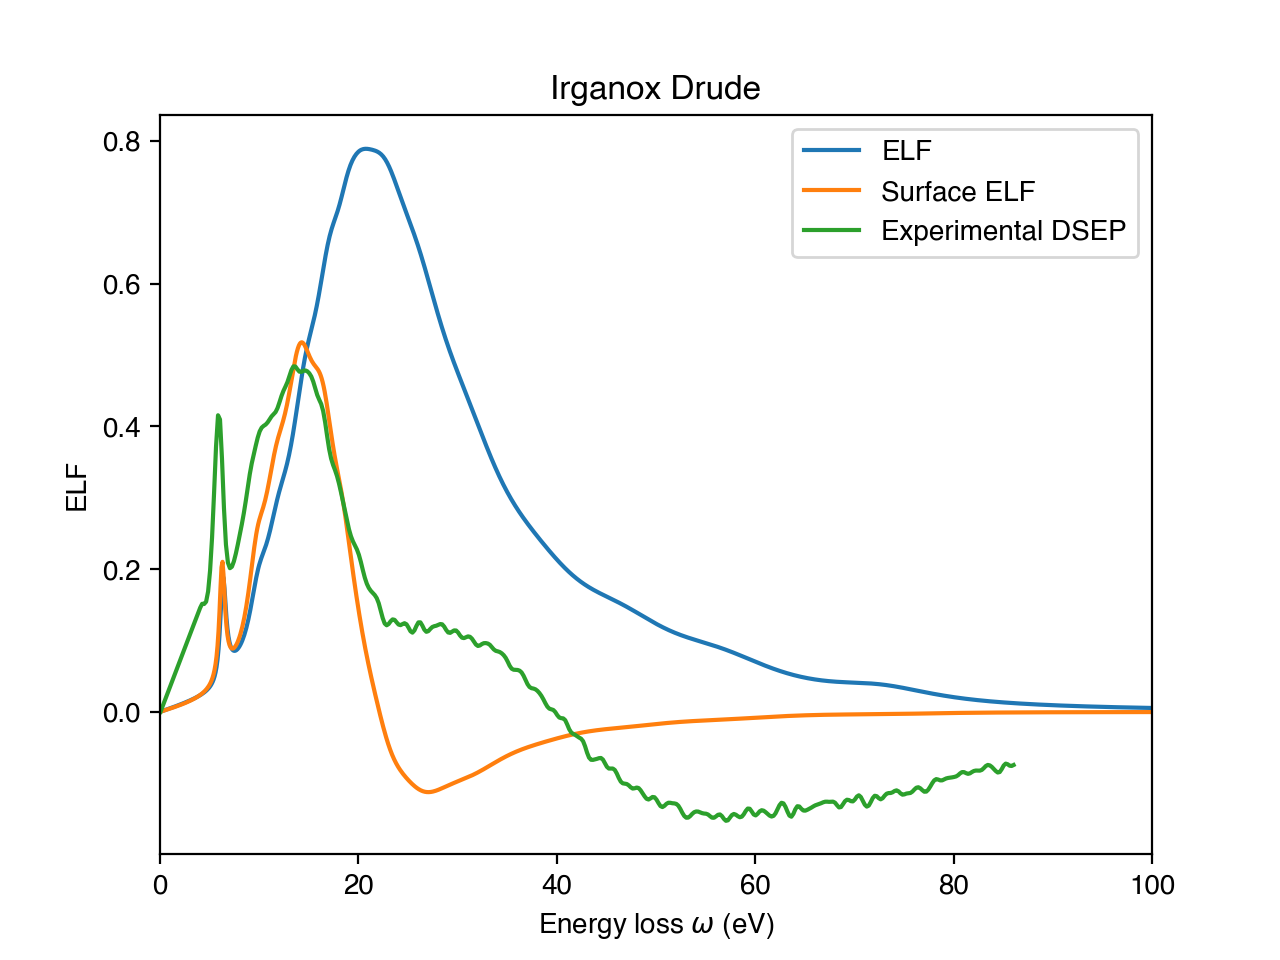

In [17]:
eps = eps_sum(oscParams)

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

fd = pd.read_csv(f'../MATLAB/dsep/{oscParams.name}_dsep.dat',sep=' ',header=None)
exp_dsep = fd.values

eps_1 = eps.real
eps_2 = eps.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

plt.figure()
# plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
# plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.plot(oscParams.eloss,surf_elf,label='Surface ELF')
plt.plot(exp_dsep[:,0],exp_dsep[:,1]*10,label='Experimental DSEP')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

*normalised DIIMFP*

<IPython.core.display.Javascript object>


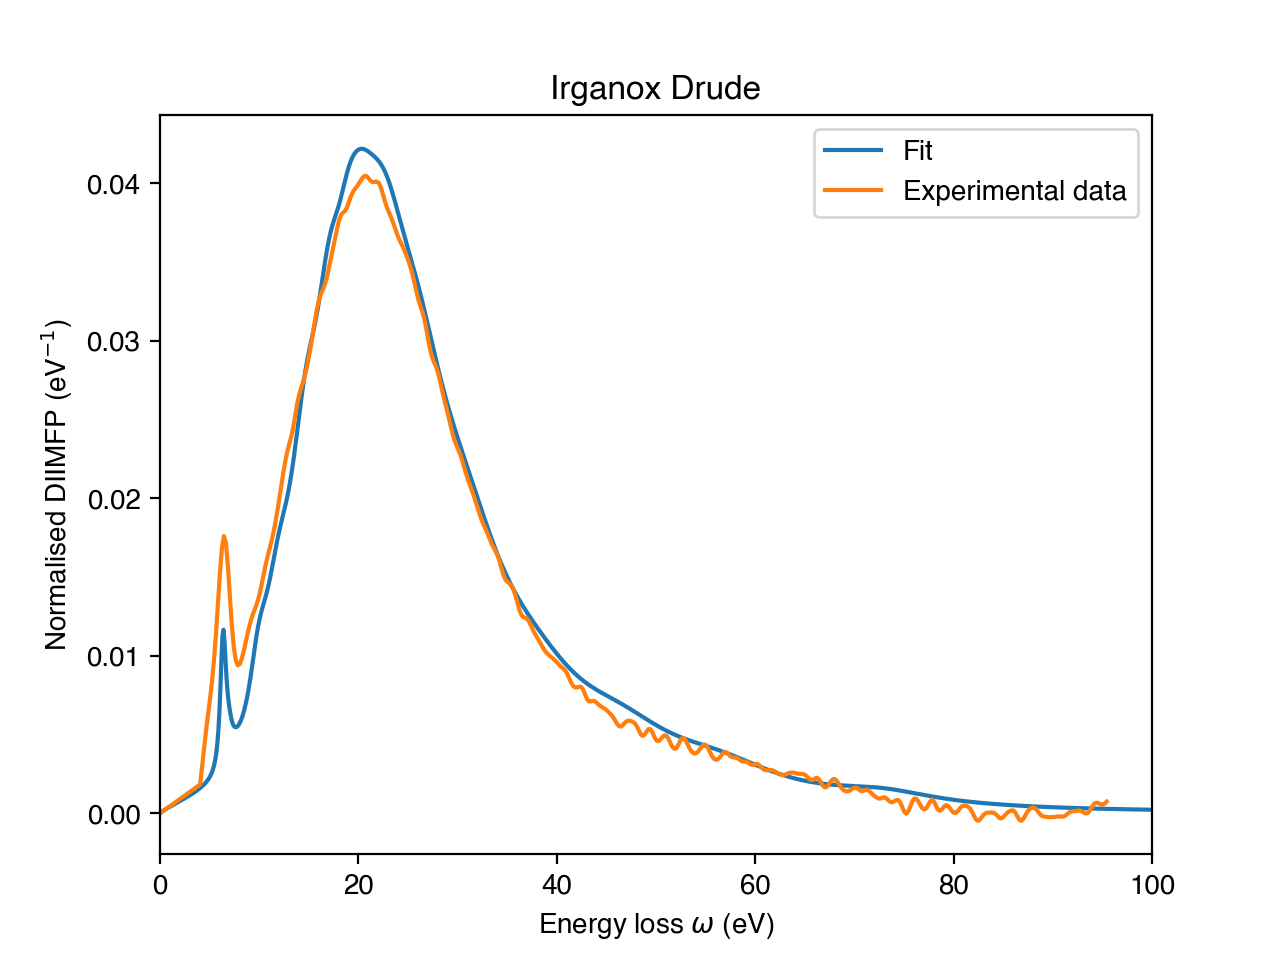

In [107]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

*IMFP*

<IPython.core.display.Javascript object>


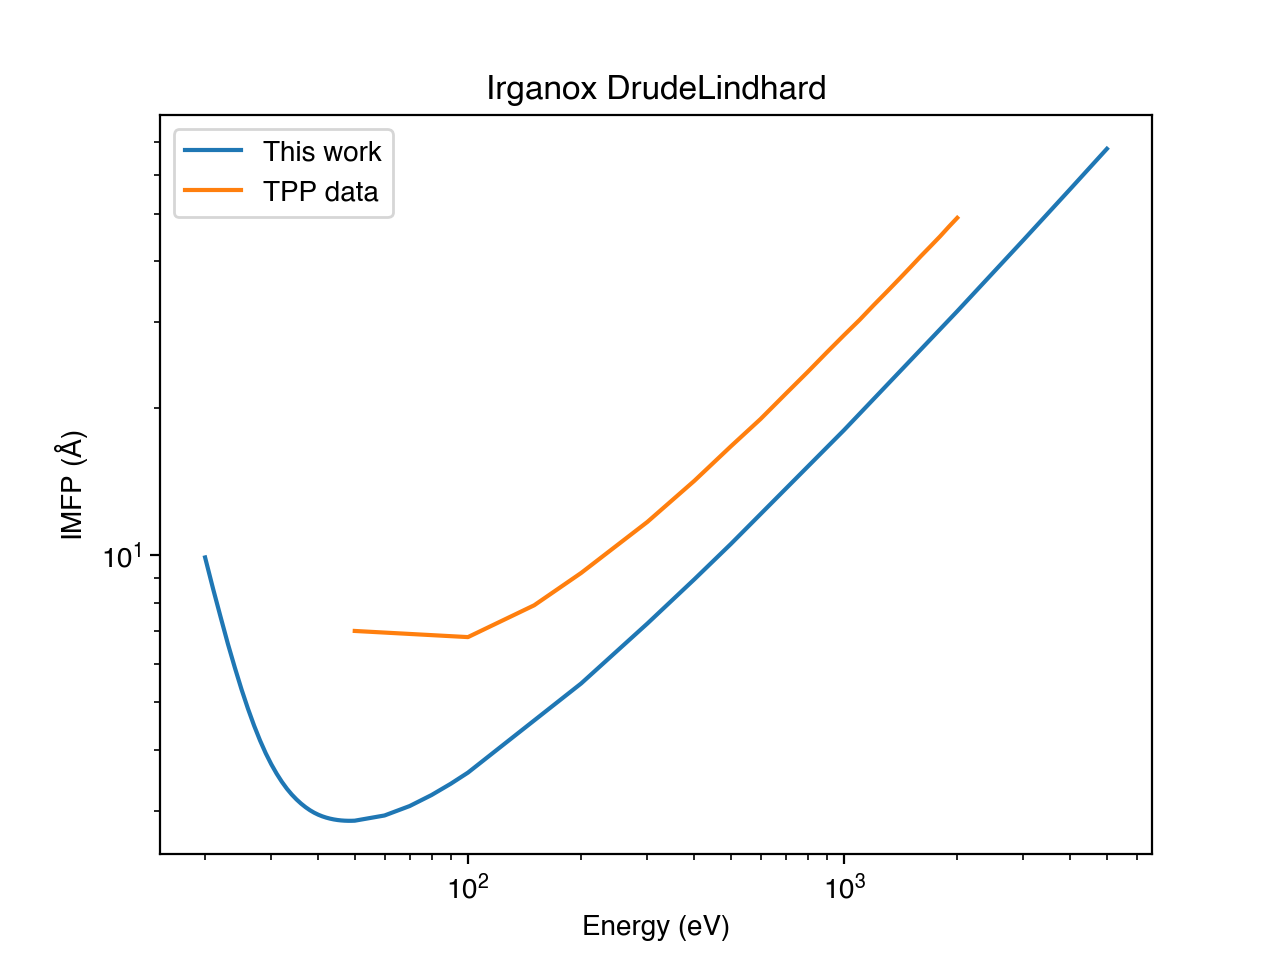

In [100]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

**Kapton**

In [18]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'Kapton'
oscParams.composition = {'element': ['c','n','o','h'], 'index': [22,2,5,10]}
oscParams.A = np.array([30.3300, 9.3000, 23.8700, 42.6400, 42.3600, 35.4100, 71.0900, 38.1300, 31.0700, 32.3500, 30.4500, 27.7000, 10.89])
oscParams.omega = np.array([5.5000, 8.7000, 10.1000, 11.8000, 14.2000, 16.7000, 20.1000, 25.3000, 31.4000, 38.2000, 47.5000, 57.0, 66.1000])
oscParams.gamma = np.array([1.9000, 1.5000, 2.5000, 3.5000, 5.0, 6.3000, 10.1000, 10.2000, 11.6000, 15.2000, 17.7000, 14.1000, 8.7000])
oscParams.alpha = 0
oscParams.eloss = np.linspace(0,100,1000)
oscParams.q = np.array([0])
oscParams.Eg = 4.2
oscParams.vb = 10
oscParams.na = 0.087

In [46]:
oscParams = Osc()
oscParams.model = 'DrudeLindhard'
oscParams.name = 'Kapton'
oscParams.composition = {'element': ['c','n','o','h'], 'index': [22,2,5,10]}
oscParams.A = np.array([0.0589, 0.0177, 0.0230, 0.0518, 0.0256, 0.0444, 0.0654, 0.0580, 0.0299, 0.0346, 0.0460, 0.0311, 0.0572, 0.0403, 0.0246, 0.0042, 0.0066, 0.0271 ,0.0381])
oscParams.omega = np.array([6.4308 ,   9.3545,   10.4160,   12.8358,   14.5493,   17.9100 ,  31.0085,   16.2088,   25.6976,   19.4088,   21.1176,   22.6716 ,  23.8908,   27.0637 ,  33.4172 ,  28.5393, 43.4855  , 37.4778  , 51.1779])
oscParams.gamma = np.array([1.6541, 5.3195, 3.0195, 3.5204, 2.9094, 3.3016, 10.1210, 3.7165, 5.9298, 3.0002, 3.6067, 4.7132, 5.9191, 6.8097, 16.7415, 7.4865, 61.2568, 12.6167, 26.2328])
oscParams.alpha = 0
oscParams.eloss = np.linspace(0,100,1000)
oscParams.q = np.array([0])
oscParams.Eg = 4.2
oscParams.vb = 10
oscParams.na = 0.087

*Dielectric function*

<IPython.core.display.Javascript object>


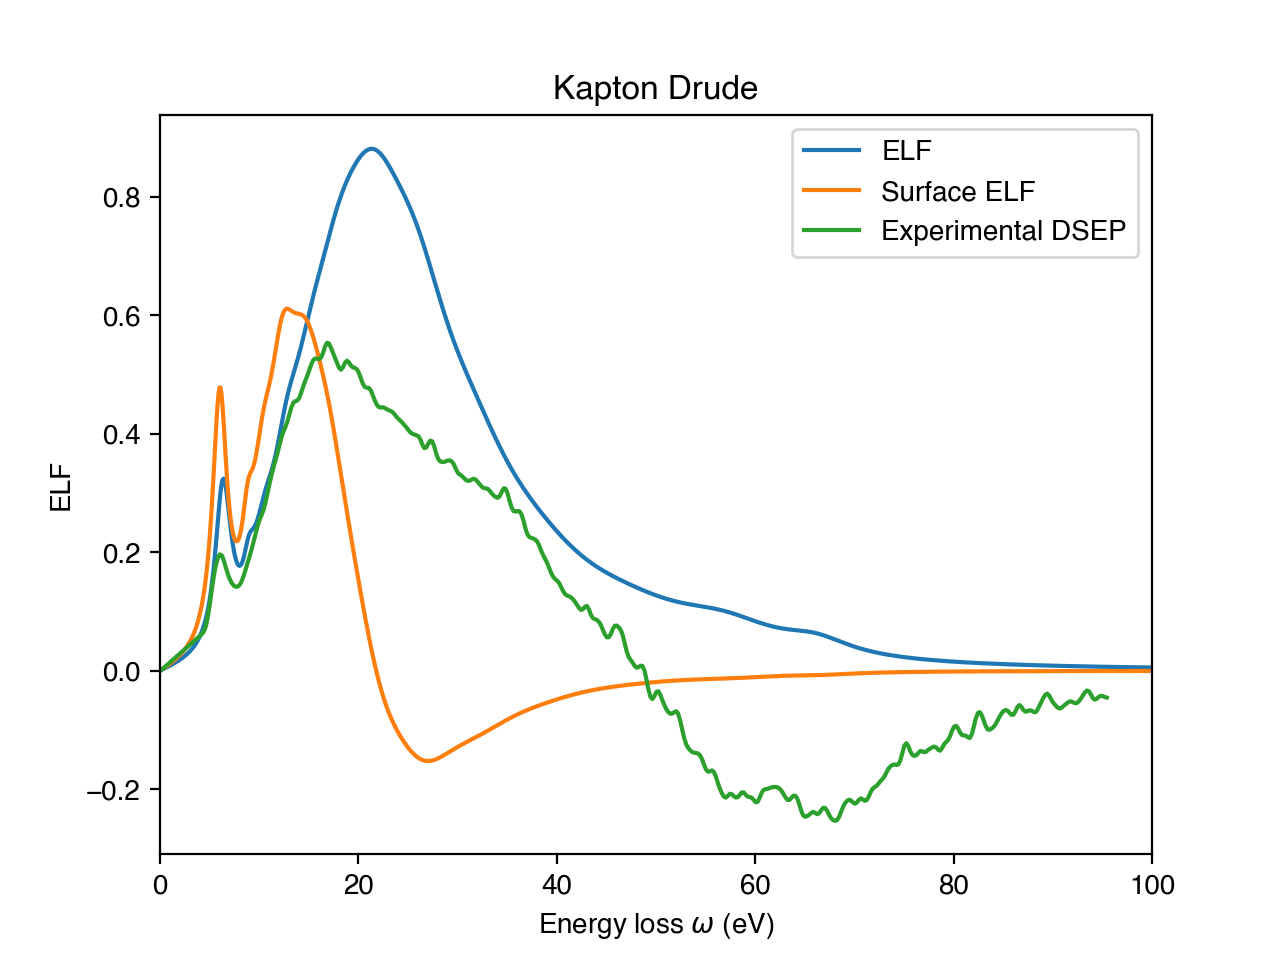

In [22]:
eps = eps_sum(oscParams)

eps_1 = eps.real
eps_2 = eps.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

fd = pd.read_csv(f'../MATLAB/dsep/{oscParams.name}_dsep.dat',sep=' ',header=None)
exp_dsep = fd.values

plt.figure()
# plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
# plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.plot(oscParams.eloss,surf_elf,label='Surface ELF')
plt.plot(exp_dsep[:,0],exp_dsep[:,1]*18,label='Experimental DSEP')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

*normalised DIIMFP*

<IPython.core.display.Javascript object>


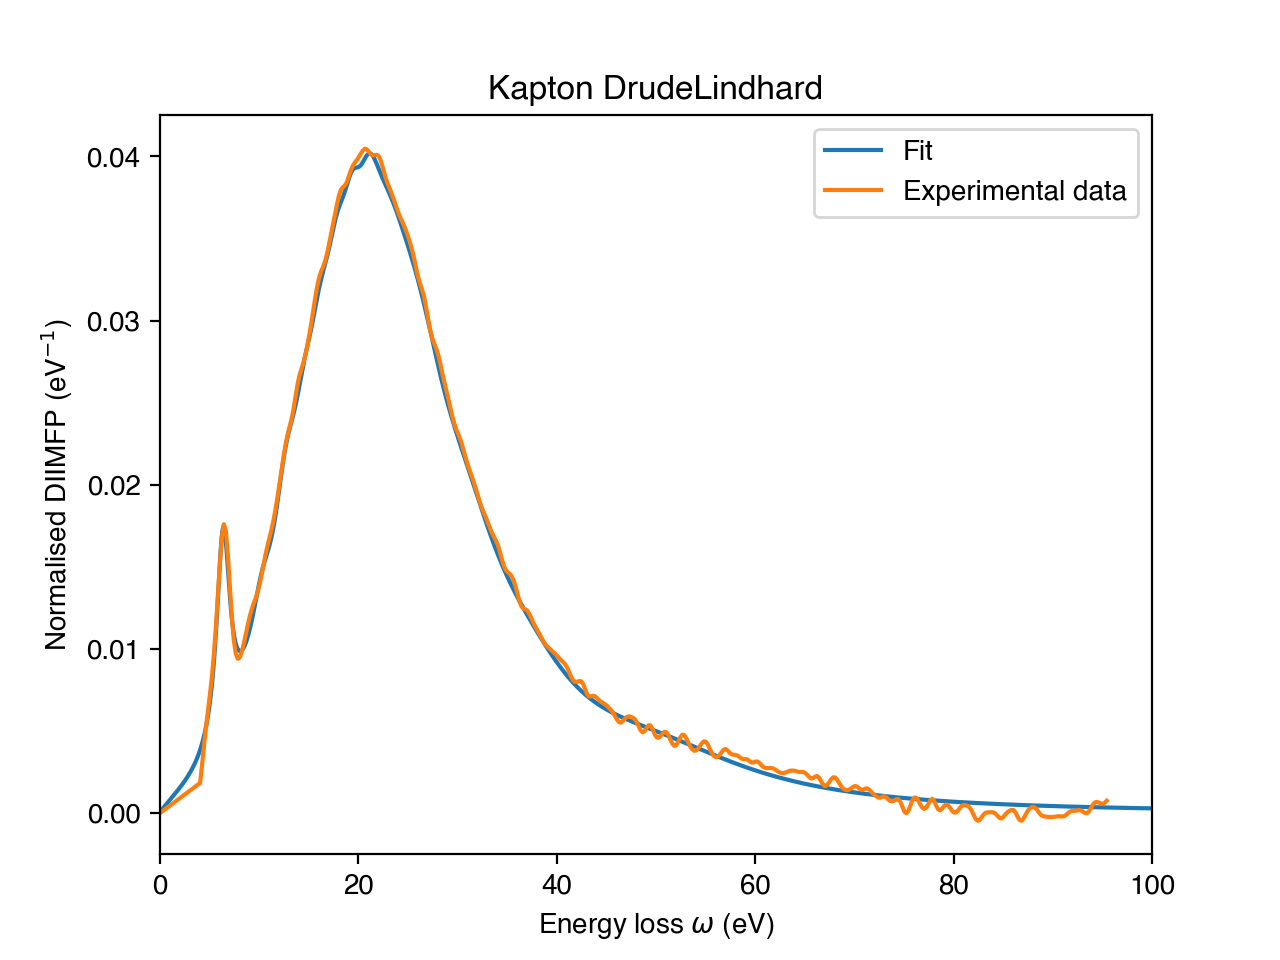

In [57]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

*IMFP*

<IPython.core.display.Javascript object>


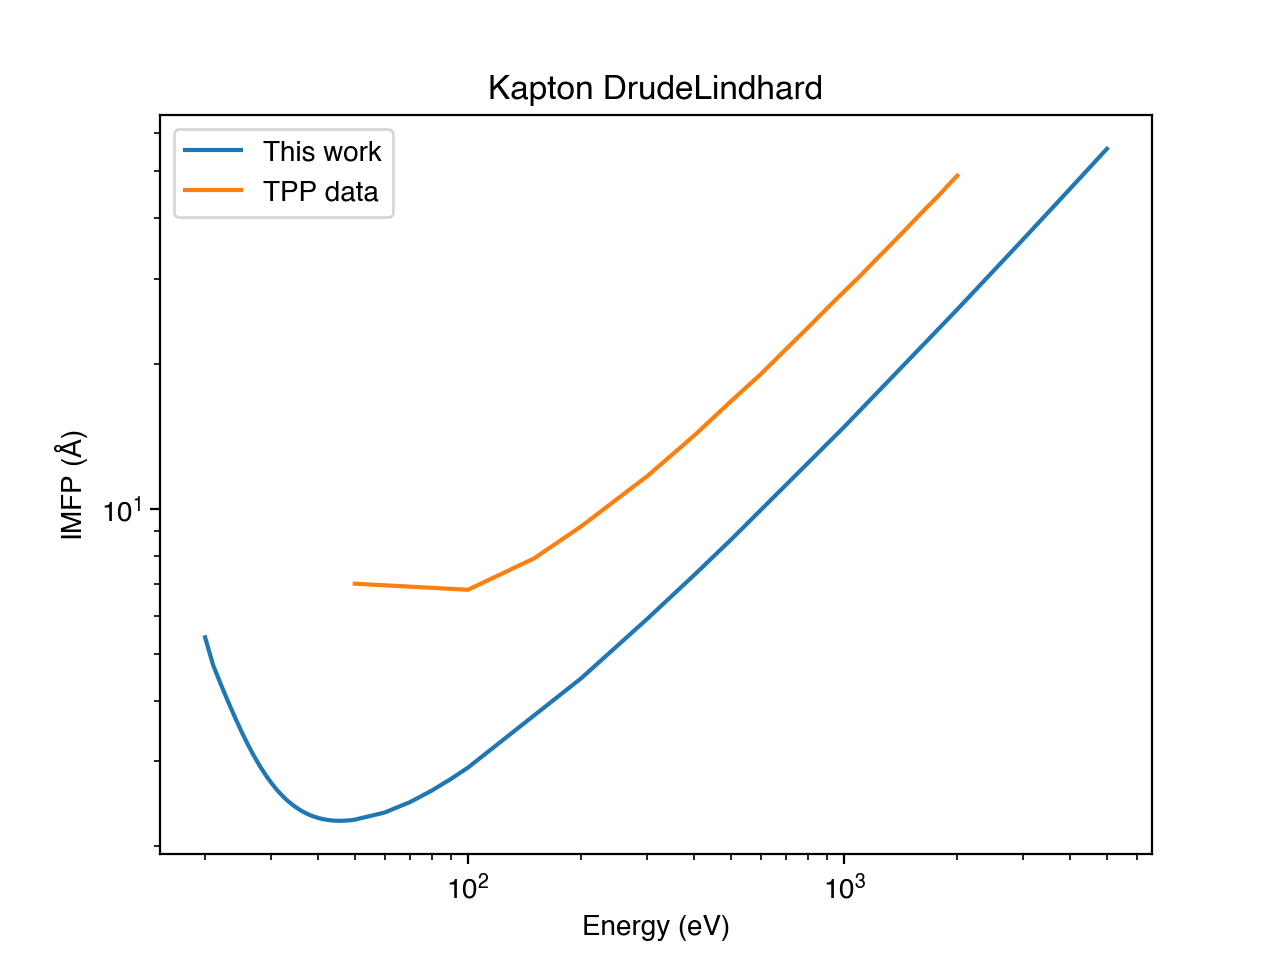

In [73]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.plot(tpp_data[:,0],tpp_data[:,8],label='TPP data')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

**PMMA**

In [23]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'PMMA'
oscParams.composition = {'element': ['c','o','h'], 'index': [5,2,8]}
oscParams.A = np.array([1196.37, 2515.98, 2213.80, 2669.71, 2772.29, 2955.37, 2761.49, 2344.97, 3924.08, 2837.09, 2849.39, 2244.36, 1676.07, 1990.05, 4195.62])*0.01
oscParams.gamma = np.array([2.1, 2.2, 2.1, 2.6, 3.1, 4.0, 5.1, 6.1, 9.3, 11.6, 15.8, 16.6, 21.2, 22.3, 41.6])
oscParams.omega = np.array([9.3, 10.5, 11.9, 13.2, 14.6, 16.5, 18.7, 21.2, 24.2, 28.5, 32.0, 36.3, 44.6, 48.4 ,62.0])
oscParams.alpha = 0
oscParams.eloss = np.linspace(0,100,1000)
oscParams.q = np.array([0])
oscParams.Eg = 6.7
oscParams.vb = 10
oscParams.na = 0.10646

In [52]:
oscParams = Osc()
oscParams.model = 'DrudeLindhard'
oscParams.name = 'PMMA'
oscParams.composition = {'element': ['c','o','h'], 'index': [5,2,8]}
oscParams.A = np.array([0.0554,    0.0254,    0.0419,    0.0749,    0.0774 ,   0.0770 ,   0.0865  ,  0.0533 ,   0.0517])
oscParams.gamma = np.array([3.4057 ,   2.6683 ,   3.1839  ,  4.5936 ,   5.6249  ,  7.8471 ,  13.8955  ,  3.5461,   40.6549])
oscParams.omega = np.array([16.1034,   11.4187,   13.8703 ,  20.6540  , 23.4906 ,  27.0763 ,  32.4494 , 18.2478,   44.8547])
oscParams.alpha = 0
oscParams.eloss = np.linspace(0,100,1000)
oscParams.q = np.array([0])
oscParams.Eg = 6.7
oscParams.vb = 10
oscParams.na = 0.10646

*Dielectric function*

<IPython.core.display.Javascript object>


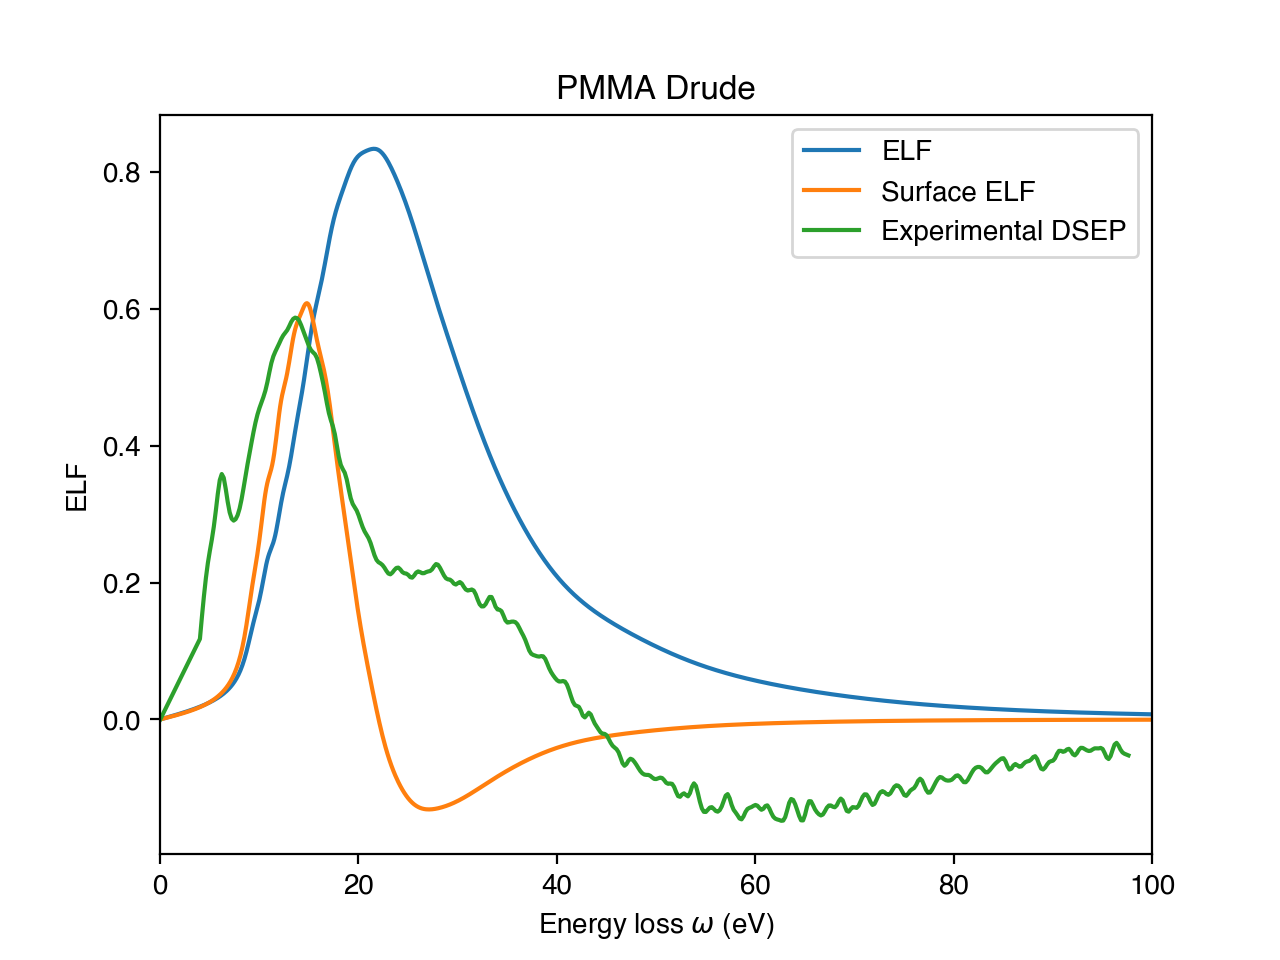

In [26]:
eps = eps_sum(oscParams)

eps_1 = eps.real
eps_2 = eps.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

fd = pd.read_csv(f'../MATLAB/dsep/{oscParams.name}_dsep.dat',sep=' ',header=None)
exp_dsep = fd.values

plt.figure()
# plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
# plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.plot(oscParams.eloss,surf_elf,label='Surface ELF')
plt.plot(exp_dsep[:,0],exp_dsep[:,1]*13,label='Experimental DSEP')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

# to save figure
# plt.savefig(f'epsilon_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'epsilon_{oscParams.name}.csv', np.transpose([oscParams.eloss,eps.real,eps.imag,(-1/eps).imag]), header="energy(eV) epsilon1 epsilon2 elf", delimiter=" ")

*normalised DIIMFP*

<IPython.core.display.Javascript object>


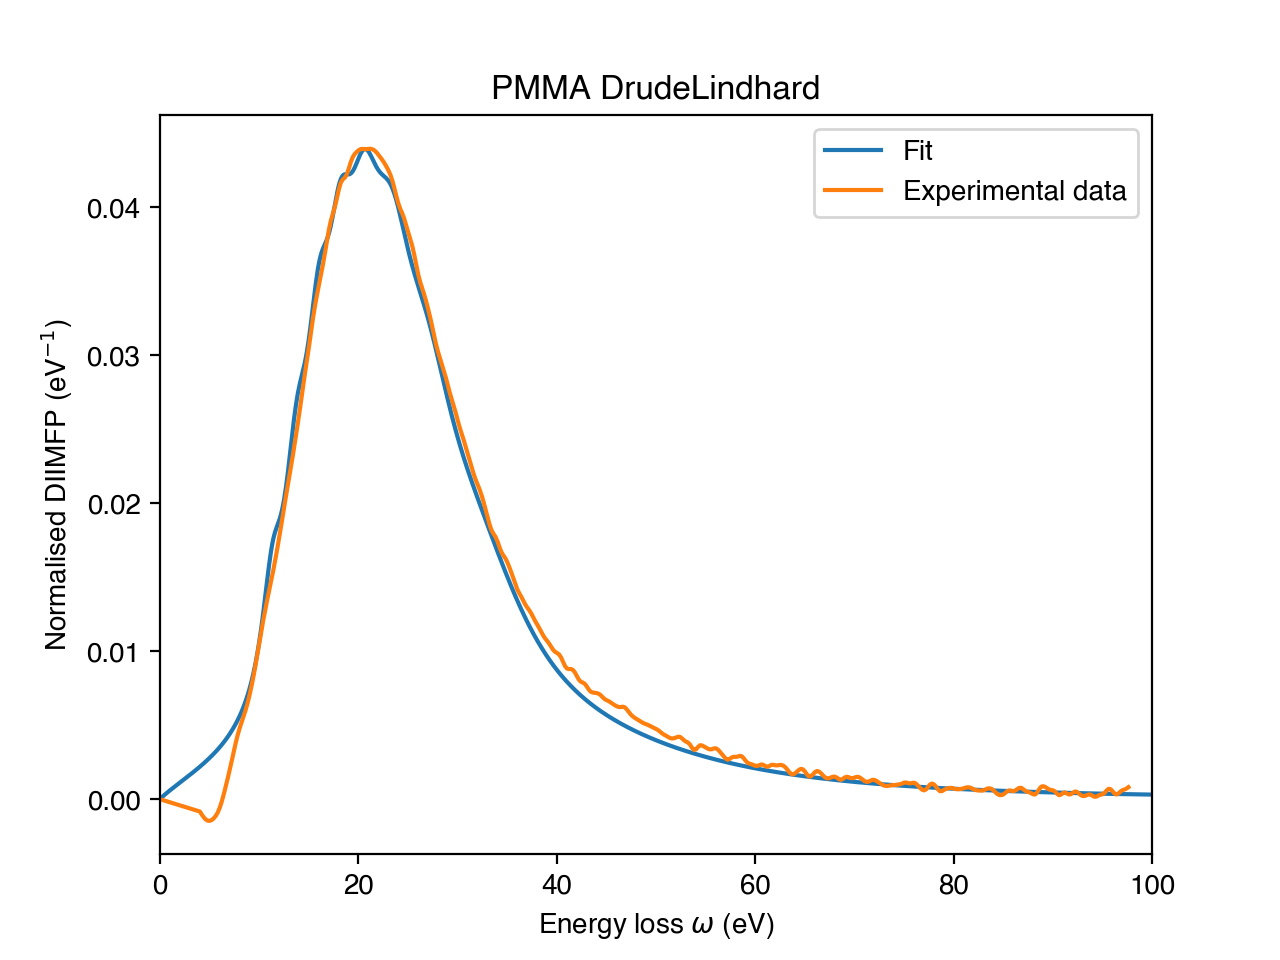

In [82]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

# to save figure
# plt.savefig(f'ndiimfp_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'diimfp_{oscParams.name}.csv', np.transpose([oscParams.eloss,w,w_normalised]), header="energy(eV) diimfp ndiimfp", delimiter=" ")

*IMFP*

<IPython.core.display.Javascript object>


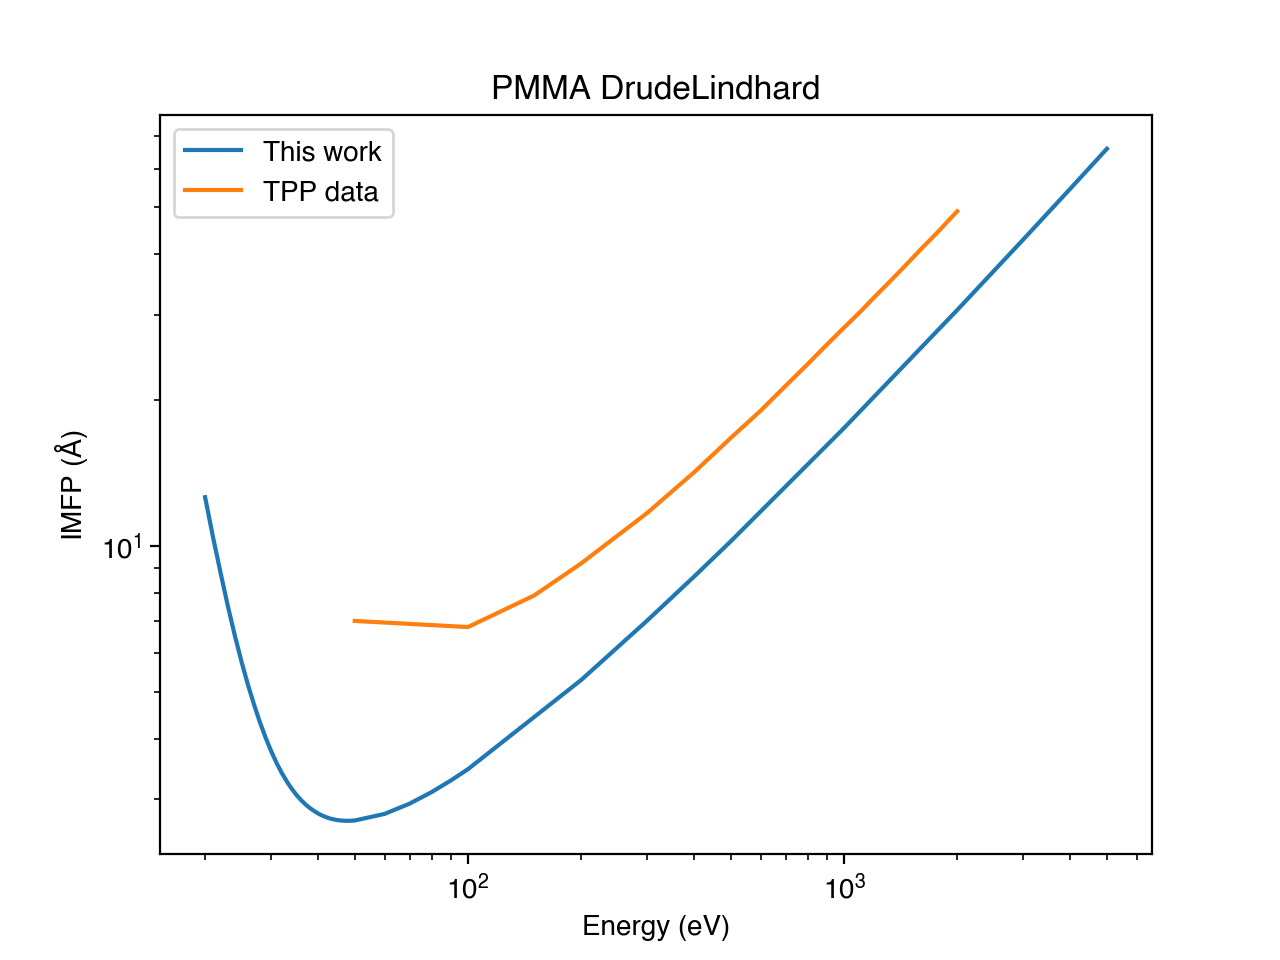

In [83]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.plot(tpp_data[:,0],tpp_data[:,12],label='TPP data')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

# to save figure
# plt.savefig(f'imfp_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'imfp_{oscParams.name}.csv', np.transpose([E0,lin]), header="energy(eV) imfp(A)", delimiter=" ")

**PE**

In [27]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'PE'
oscParams.composition = {'element': ['c','h'], 'index': [2,4]}
oscParams.A = np.array([3096.49, 3386.26, 3383.68, 2932.40, 2606.66, 2710.75, 2745.19, 1094.67, 1213.62, 1809.36, 2092.78, 3412.72, 2053.60, 844.71])*0.01
oscParams.gamma = np.array([0.6, 1.5, 2.6, 2.9, 3.6, 11.9, 4.4, 3.4, 3.9, 6.7, 12.1, 14.3, 16.8, 89.7])
oscParams.omega = np.array([7.9, 8.4, 9.7, 10.9, 12.5, 14.8, 14.9, 17.3, 19.5, 22.2, 26.0, 26.1, 31.2, 72.0])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 7.5
oscParams.vb = 6
oscParams.na = 0.1210667997

In [ ]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'PE'
oscParams.composition = {'element': ['c','h'], 'index': [2,4]}
oscParams.A = np.array([3096.49, 3386.26, 3383.68, 2932.40, 2606.66, 2710.75, 2745.19, 1094.67, 1213.62, 1809.36, 2092.78, 3412.72, 2053.60, 844.71])*0.01
oscParams.gamma = np.array([0.6, 1.5, 2.6, 2.9, 3.6, 11.9, 4.4, 3.4, 3.9, 6.7, 12.1, 14.3, 16.8, 89.7])
oscParams.omega = np.array([7.9, 8.4, 9.7, 10.9, 12.5, 14.8, 14.9, 17.3, 19.5, 22.2, 26.0, 26.1, 31.2, 72.0])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 7.5
oscParams.vb = 6
oscParams.na = 0.1210667997

*Dielectric function*

<IPython.core.display.Javascript object>


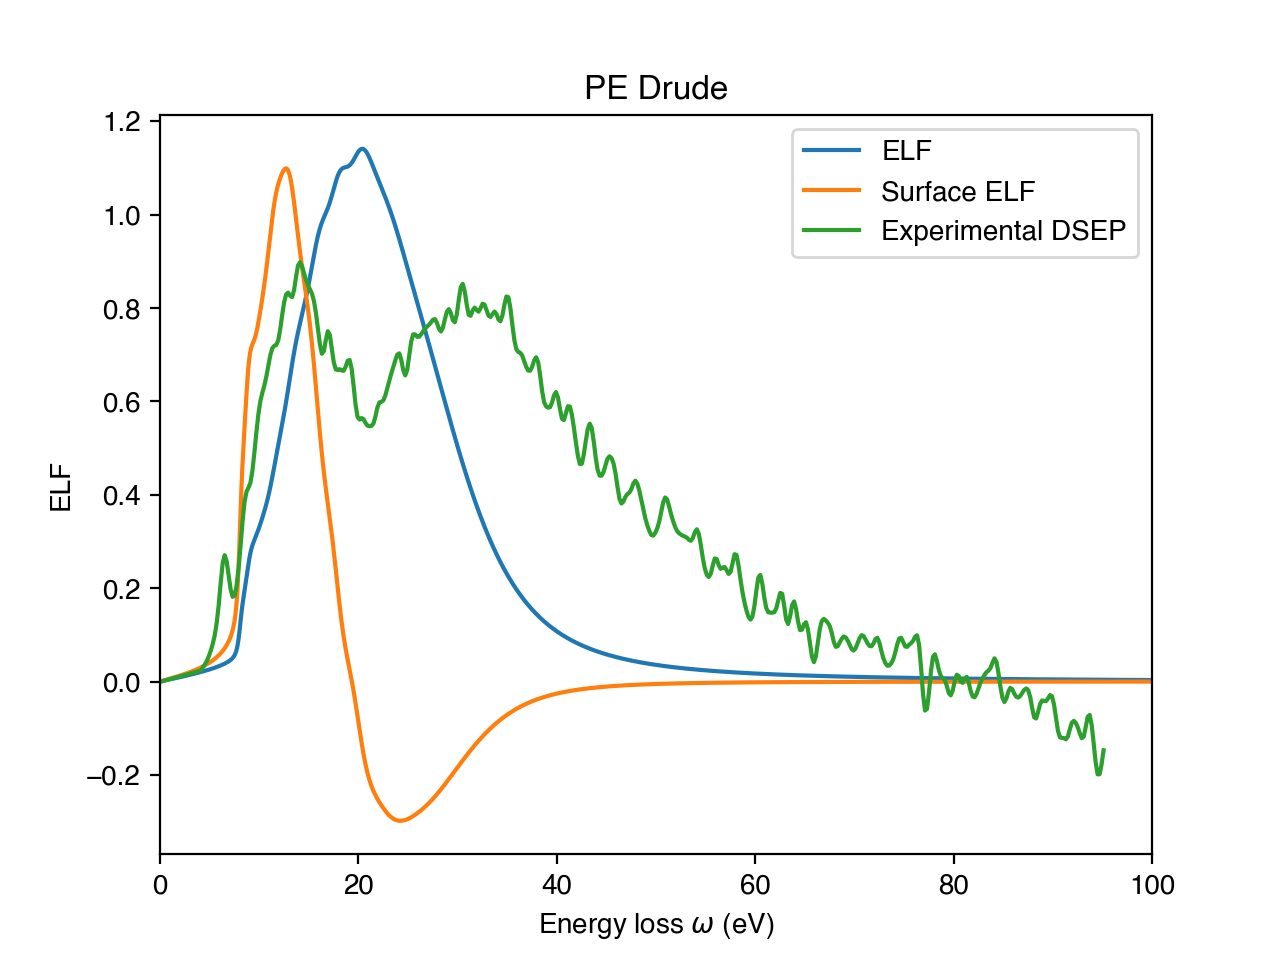

In [31]:
eps = eps_sum(oscParams)

eps_1 = eps.real
eps_2 = eps.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

fd = pd.read_csv(f'../MATLAB/dsep/{oscParams.name}_dsep.dat',sep=' ',header=None)
exp_dsep = fd.values

plt.figure()
# plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
# plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.plot(oscParams.eloss,surf_elf,label='Surface ELF')
plt.plot(exp_dsep[:,0],exp_dsep[:,1]*65,label='Experimental DSEP')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

# to save figure
# plt.savefig(f'epsilon_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'epsilon_{oscParams.name}.csv', np.transpose([oscParams.eloss,eps.real,eps.imag,(-1/eps).imag]), header="energy(eV) epsilon1 epsilon2 elf", delimiter=" ")

*normalised DIIMFP*

<IPython.core.display.Javascript object>


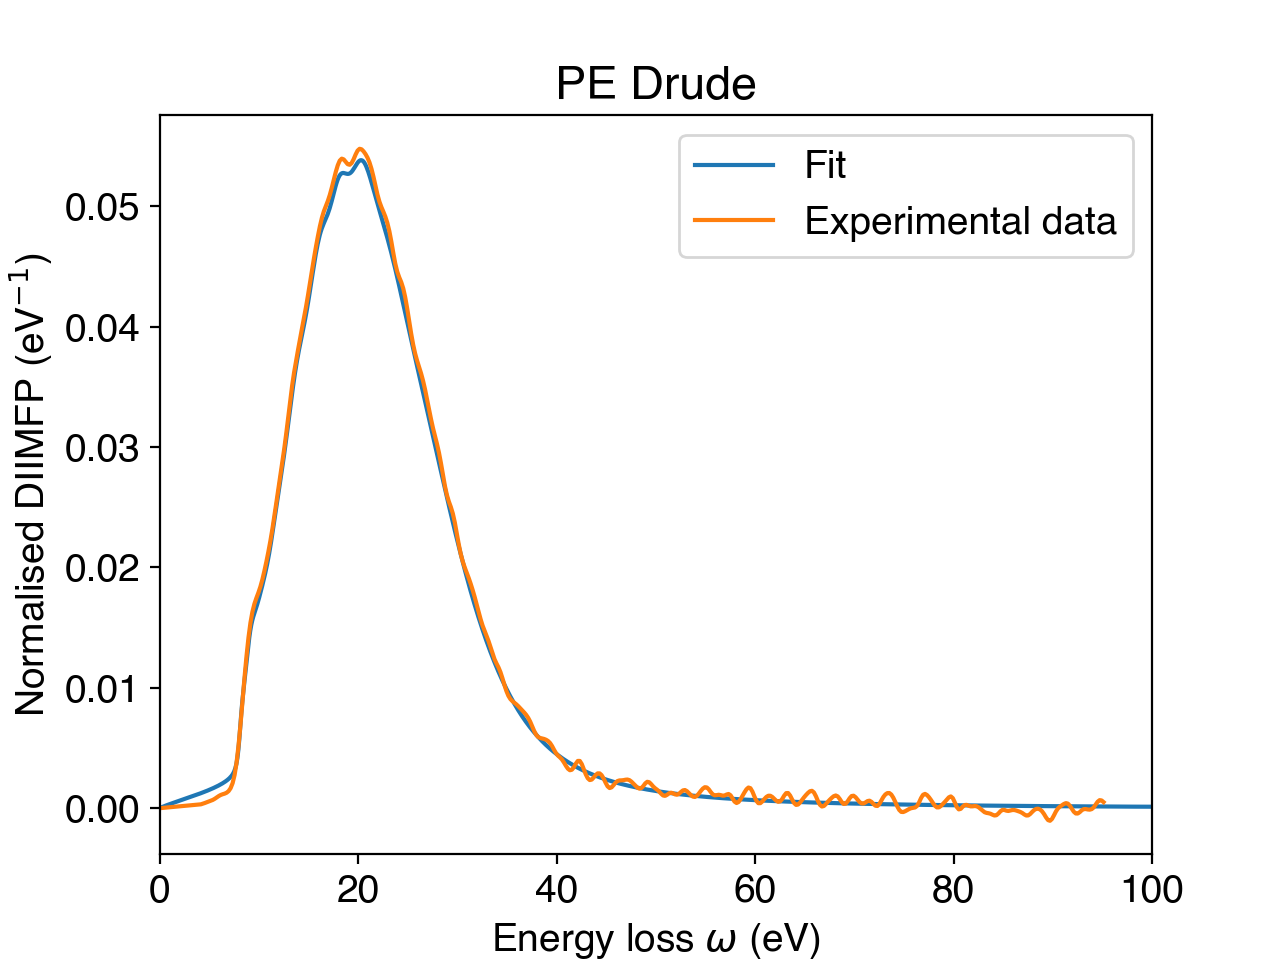

In [82]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

# to save figure
# plt.savefig(f'ndiimfp_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'diimfp_{oscParams.name}.csv', np.transpose([oscParams.eloss,w,w_normalised]), header="energy(eV) diimfp ndiimfp", delimiter=" ")

*IMFP*

<IPython.core.display.Javascript object>


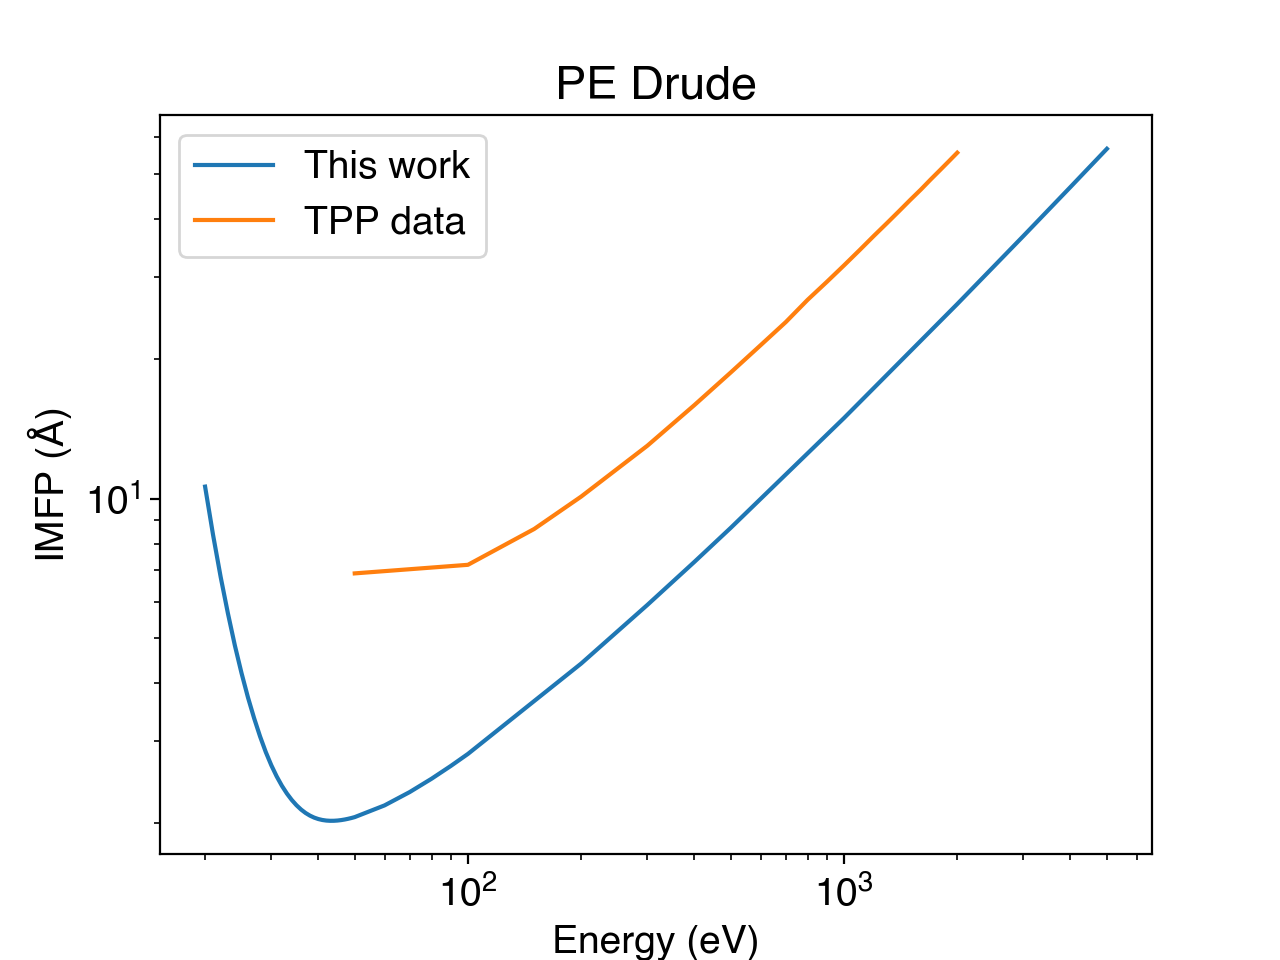

In [83]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.plot(tpp_data[:,0],tpp_data[:,11],label='TPP data')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

# to save figure
# plt.savefig(f'imfp_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'imfp_{oscParams.name}.csv', np.transpose([E0,lin]), header="energy(eV) imfp(A)", delimiter=" ")

**PS**

In [32]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'PS'
oscParams.composition = {'element': ['c','h'], 'index': [8,8]}
oscParams.A = np.array([61.94, 6.89,32.36,34.78,31.78,40.3,36.12,27.7,22.66,18.23,12.48,9.55])
oscParams.gamma = np.array([0.5,0.5,5.2,2.7,3,3.8,4.5,5.2,5.4,5.3,4.8,4.7])
oscParams.omega = np.array([5.2,8.9,9.6,9.8,11.8,14.2,17.1,20.3,23.6,27.1,30.6,34.4])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 5.7
oscParams.vb = 10
oscParams.na = 0.097

In [73]:
oscParams = Osc()
oscParams.model = 'DrudeLindhard'
oscParams.name = 'PS'
oscParams.composition = {'element': ['c','h'], 'index': [8,8]}
oscParams.A = np.array([0.094,0.012,0.014,0.059,0.143,0.12,0.135,0.115,0.06,0.036,0.021,0.006])
oscParams.gamma = np.array([0.96,1.1,1.71,3.27,5.09,4.17,4.56,4.83,4.21,3.99,3.84,2.63])
oscParams.omega = np.array([6.9,9.69,10.72,12.7,15.97,18.88,21.51,24.35,27.29,30.14,33.12,35.93])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 5.7
oscParams.vb = 10
oscParams.na = 0.097

*Dielectric function*

<IPython.core.display.Javascript object>


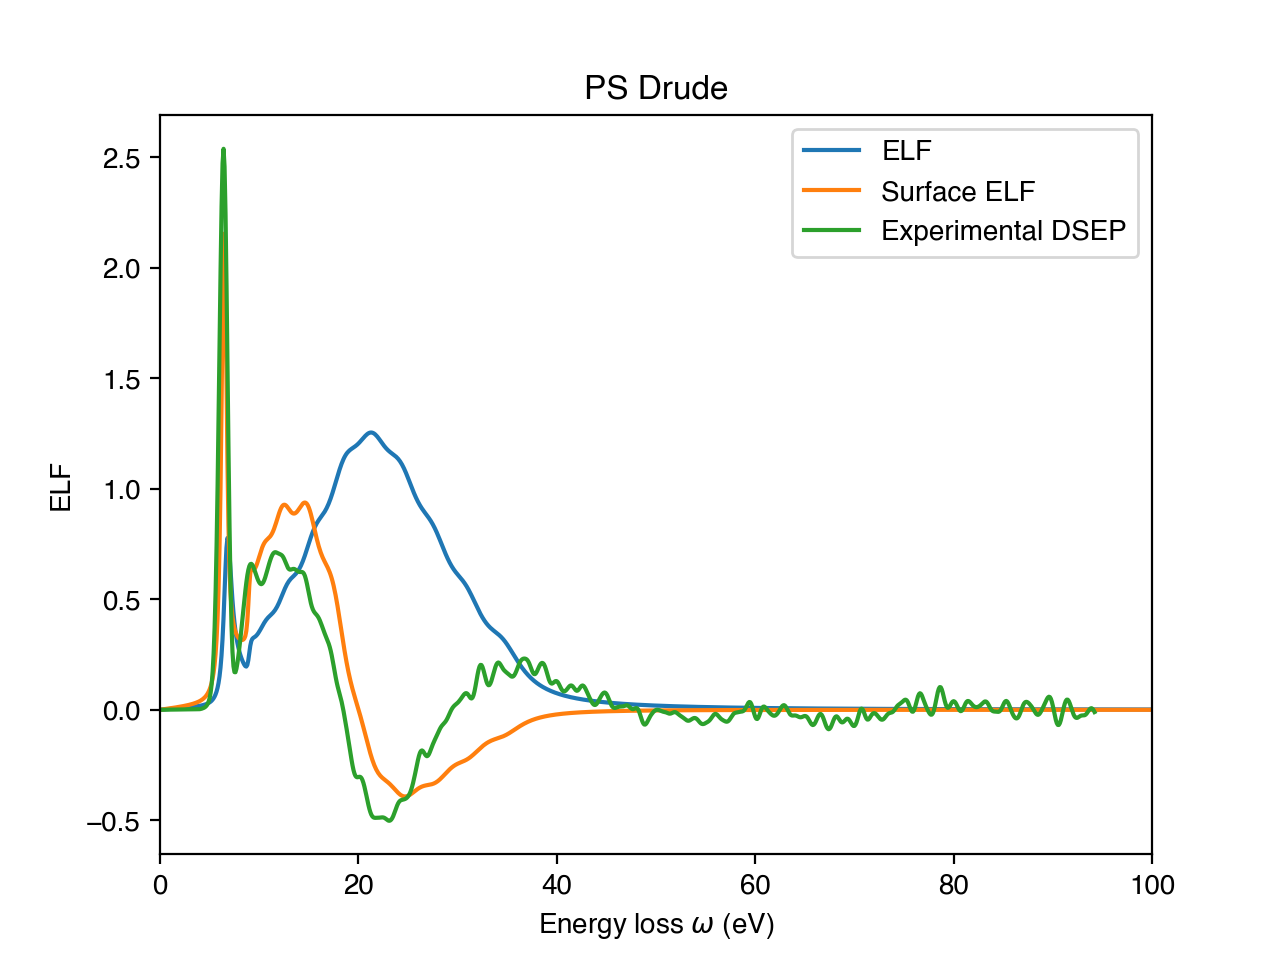

In [36]:
eps = eps_sum(oscParams)

eps_1 = eps.real
eps_2 = eps.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

fd = pd.read_csv(f'../MATLAB/dsep/{oscParams.name}_dsep.dat',sep=' ',header=None)
exp_dsep = fd.values

plt.figure()
# plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
# plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.plot(oscParams.eloss,surf_elf,label='Surface ELF')
plt.plot(exp_dsep[:,0],exp_dsep[:,1]*25,label='Experimental DSEP')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

*Normalised DIIMFP*

<IPython.core.display.Javascript object>


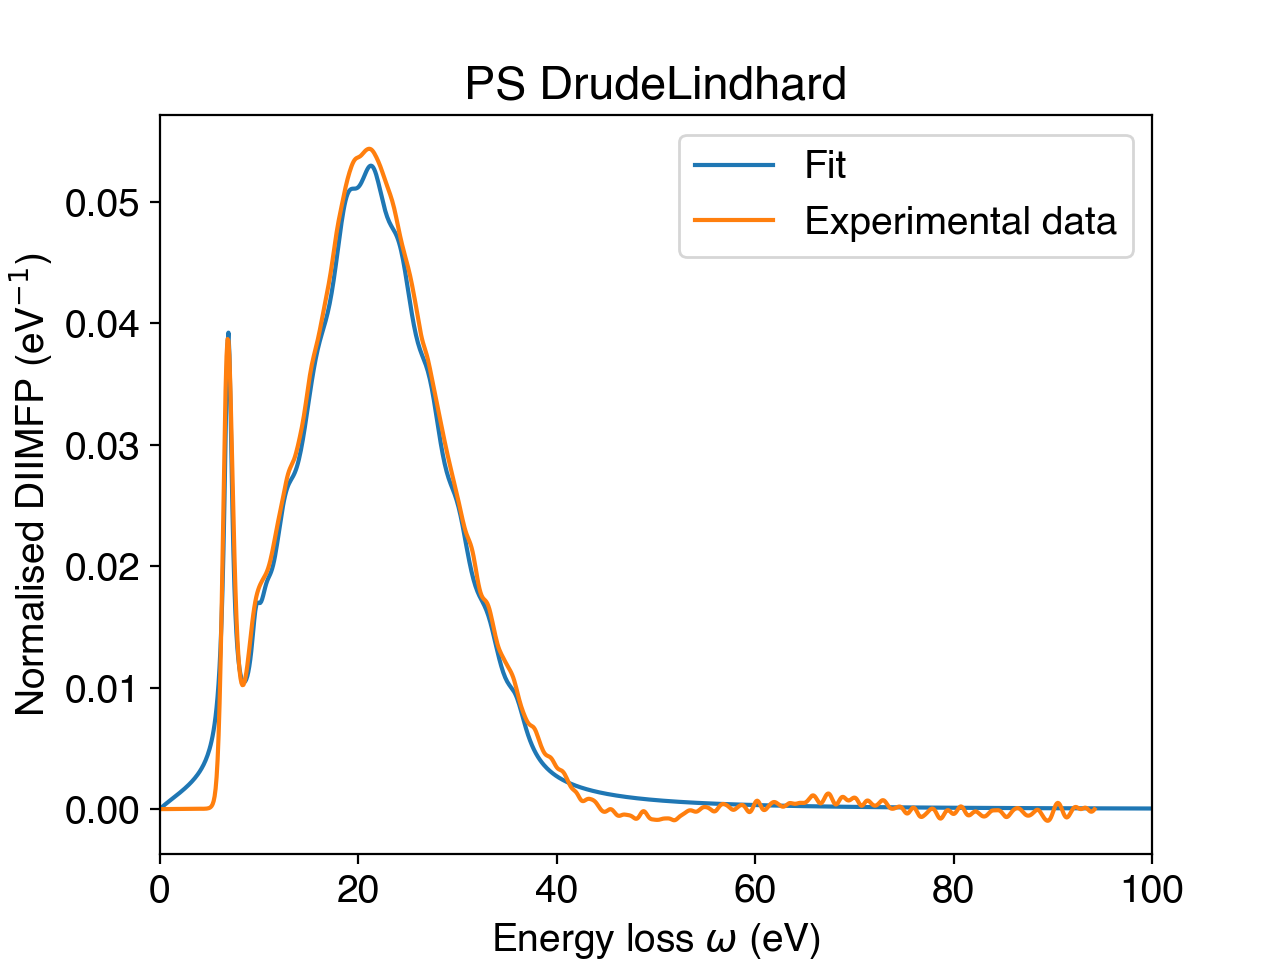

In [75]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

*IMFP*

<IPython.core.display.Javascript object>


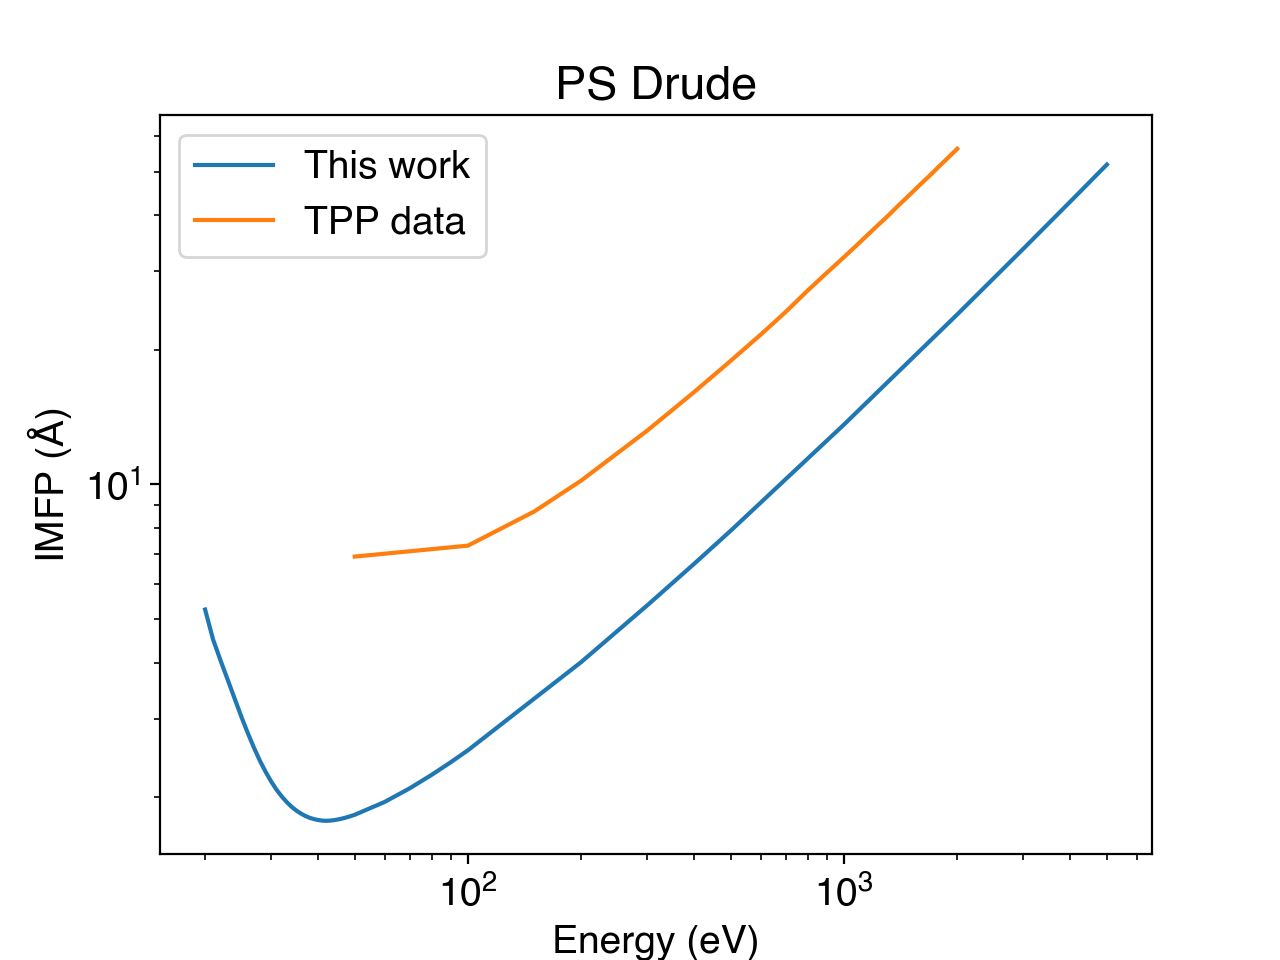

In [80]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.plot(tpp_data[:,0],tpp_data[:,13],label='TPP data')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

# to save figure
# plt.savefig(f'imfp_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'imfp_{oscParams.name}.csv', np.transpose([E0,lin]), header="energy(eV) imfp(A)", delimiter=" ")

**PTFE**

In [46]:
oscParams = Osc()
oscParams.model = 'Drude'
oscParams.name = 'PTFE'
oscParams.composition = {'element': ['c','f'], 'index': [2,4]}
oscParams.A = np.array([0.93,3.87,39.19,15.06,38.65,92.64,105,185,168.28])
oscParams.gamma = np.array([0.4,1.04,3.27,4.6,5.28,11.81,21.96,41.3,191.86])
oscParams.omega = np.array([7.94,12.38,15.57,19.54,20.42,26.11,36.96,52.95,86.83])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 7.2
oscParams.vb = 5.5
oscParams.na = 0.078

In [70]:
oscParams = Osc()
oscParams.model = 'DrudeLindhard'
oscParams.name = 'PTFE'
oscParams.composition = {'element': ['c','f'], 'index': [2,4]}
oscParams.A = np.array([0.006,0.007,0.038,0.02,0.061,0.047,0.029,0.016,0.057,0.04,0.06,0.062])
oscParams.gamma = np.array([0.49,1.12,2.82,3.47,4.2,4.99,4.41,3.75,9.12,12.15,24.65,60.22])
oscParams.omega = np.array([8.01,12.63,16.21,18,21.26,24.26,27.08,29.39,33.15,39.96,49.89,65.47])
oscParams.alpha = 0
oscParams.eloss = linspace(machine_eps,100,0.1)
oscParams.q = np.array([0])
oscParams.Eg = 7.2
oscParams.vb = 5.5
oscParams.na = 0.078

*Dielectric function*

<IPython.core.display.Javascript object>


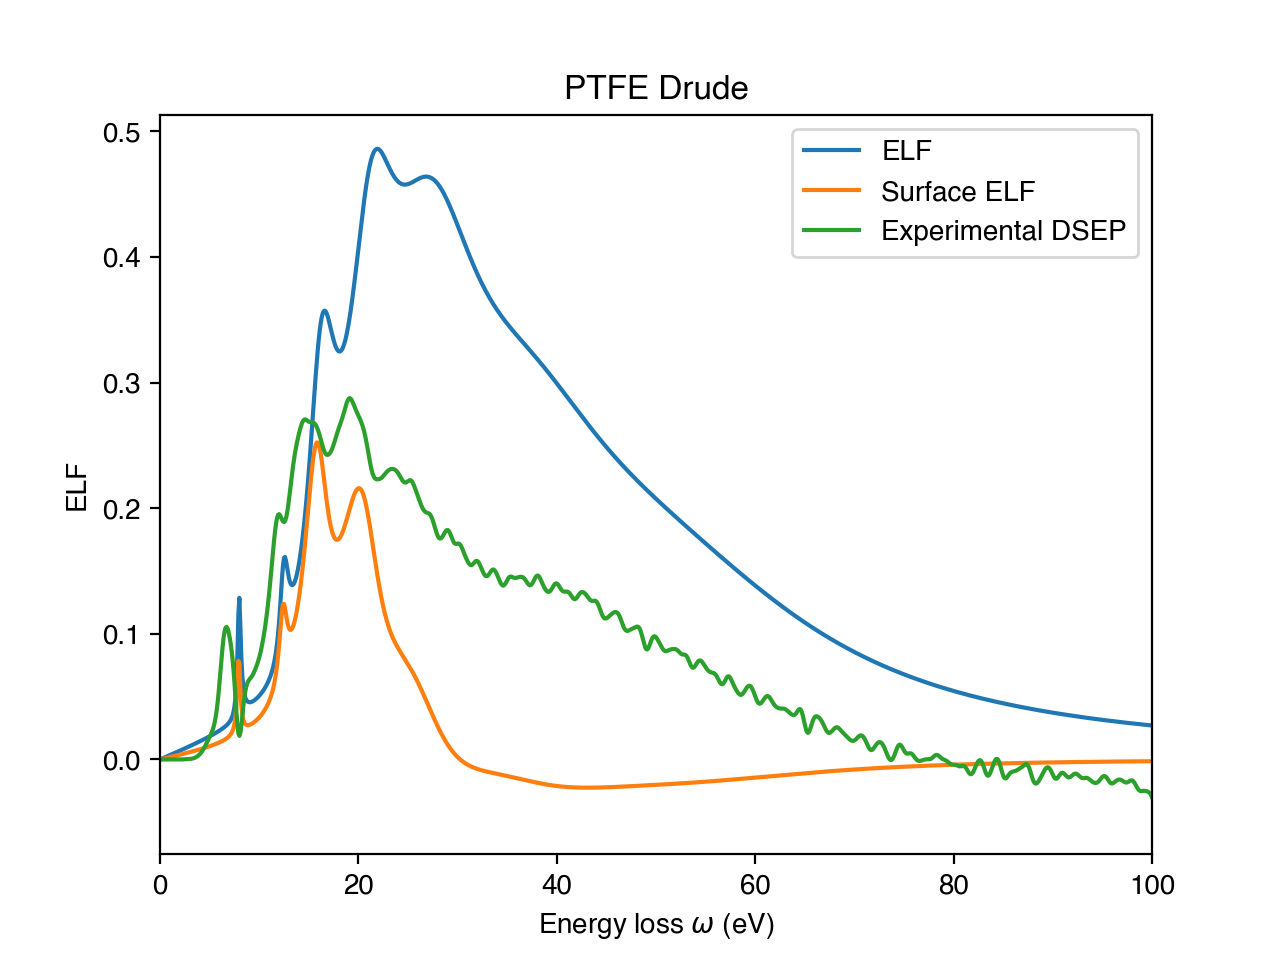

In [47]:
eps = eps_sum(oscParams)

eps_1 = eps.real
eps_2 = eps.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

# extending the ELF with the Henke ionisation data to higher energy losses
#=========================================================================
# energy_henke, elf_henke = mopt(oscParams.composition, oscParams.na)
# ind_henke = energy_henke > 100
# ind = oscParams.eloss <= 100
# eloss = np.concatenate((oscParams.eloss[ind],energy_henke[ind_henke]))
# elf = np.concatenate(((-1/eps).imag[ind],elf_henke[ind_henke]))
# plt.plot(eloss,elf)
#=========================================================================

fd = pd.read_csv(f'../MATLAB/dsep/{oscParams.name}_dsep.dat',sep=' ',header=None)
exp_dsep = fd.values

plt.figure()
# plt.plot(oscParams.eloss,eps.real,label='$\epsilon_1$')
# plt.plot(oscParams.eloss,eps.imag,label='$\epsilon_2$')
plt.plot(oscParams.eloss,(-1/eps).imag,label='ELF')
plt.plot(oscParams.eloss,surf_elf,label='Surface ELF')
plt.plot(exp_dsep[:,0],exp_dsep[:,1]*7,label='Experimental DSEP')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

plt.savefig(f'{oscParams.name}_{oscParams.model}_surface.png',dpi=600)

*Normalised DIIMFP*

<IPython.core.display.Javascript object>


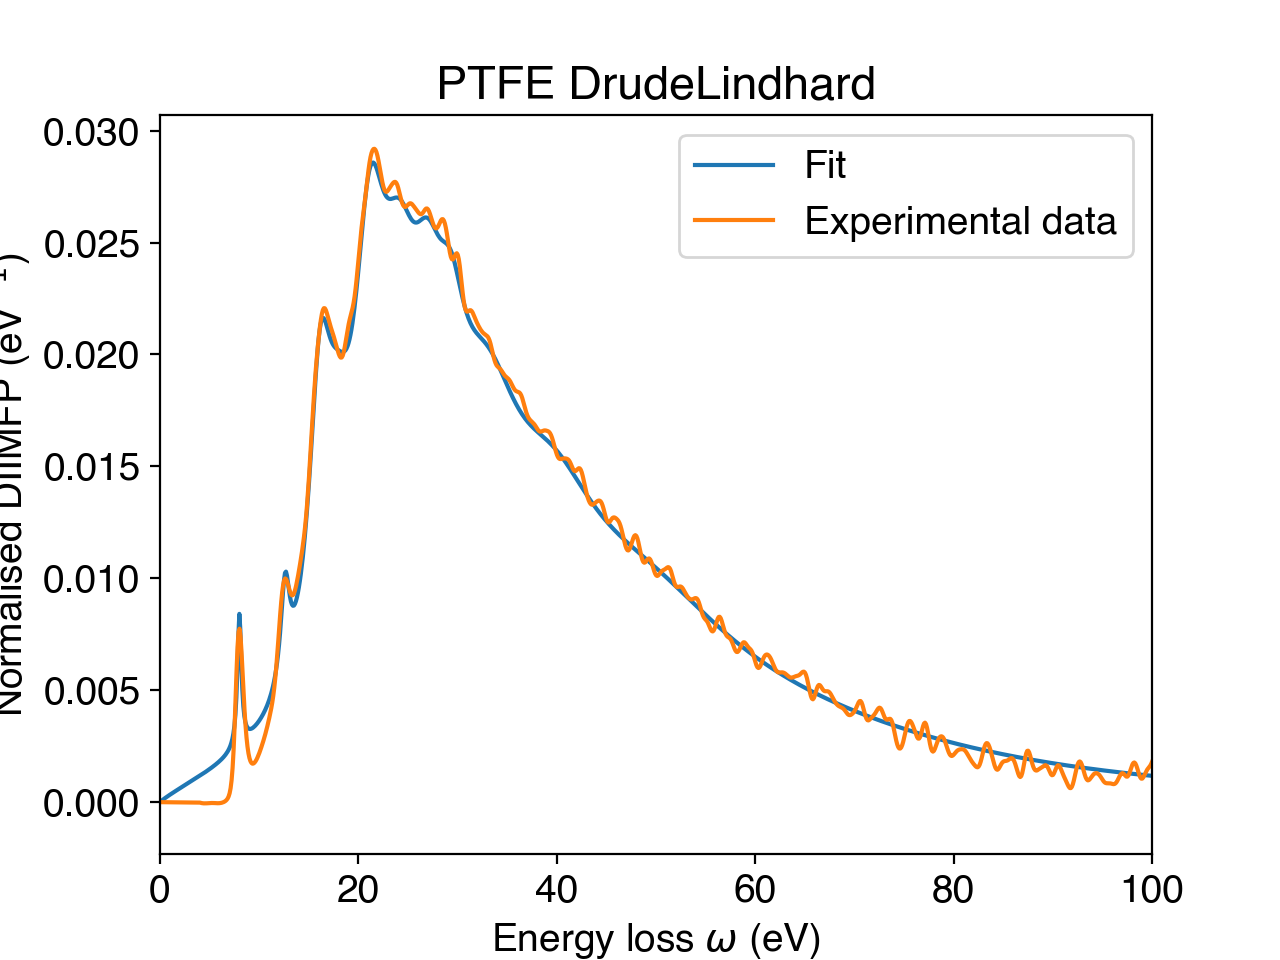

In [72]:
E0 = 1600 
eloss, w = diimfp(oscParams, E0, 11)
w_normalised = w / np.trapz(w, eloss)

fd = pd.read_csv(f'diimfp/{oscParams.name}_diimfp.dat',sep=' ',header=None)
exp_diimfp = fd.values

plt.figure()
plt.plot(eloss,w_normalised,label='Fit')
plt.plot(exp_diimfp[:,0],exp_diimfp[:,1],label='Experimental data')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('Normalised DIIMFP (eV$^{-1}$)')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.xlim(0,100)
plt.show()

*IMFP*

<IPython.core.display.Javascript object>


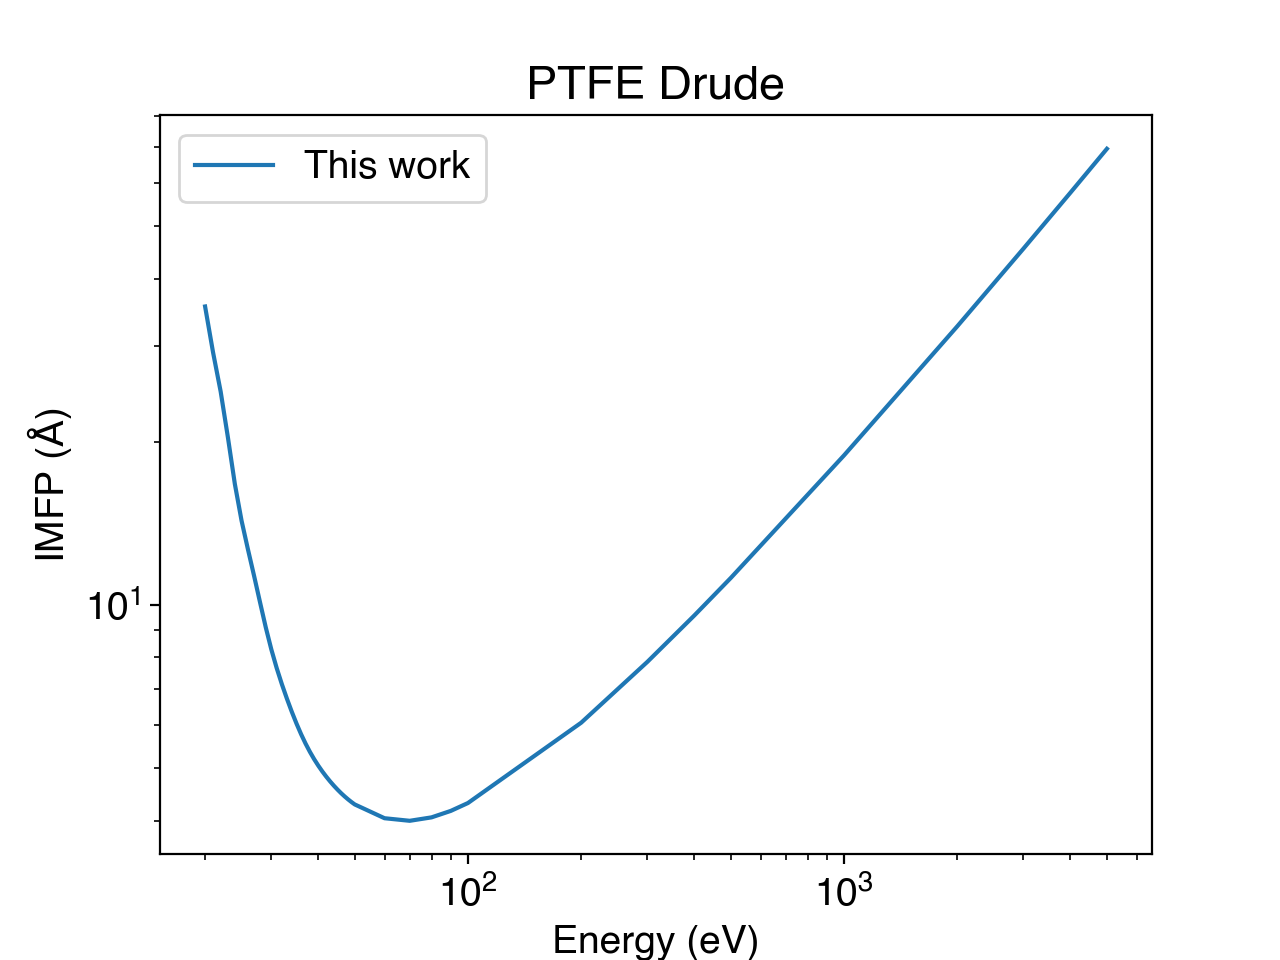

In [78]:
E0 = np.hstack((linspace(20,50),linspace(60,100,10),linspace(200,500,100),linspace(1000,5000,1000)))
lin = imfp(oscParams,E0)

plt.figure()
plt.plot(E0, lin,label='This work')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.title(f'{oscParams.name} {oscParams.model}')
plt.legend()
plt.show()

# to save figure
# plt.savefig(f'imfp_{oscParams.name}.png',dpi=600,bbox_inches='tight')

# to save data to csv
# np.savetxt(f'imfp_{oscParams.name}.csv', np.transpose([E0,lin]), header="energy(eV) imfp(A)", delimiter=" ")

**Au**

In [89]:
oscParams = Osc()
oscParams.model = 'DrudeLindhard'
oscParams.name = 'Au'
oscParams.composition = {'element': ['au'], 'index': [1]}
oscParams.A = np.array([0.01, 0.02, 0.07, 0.1, 0.07,0.007, 0.16, 0.15,0.13,0.08,0.02,0.09,0.16,0.02,0.003,0.005,0.008])
oscParams.omega = np.array([2.62,3.34,6.31,10.58,17.08,25.75,25.39,33.65,39.17,45.72,52.12,14.57,64.21,96.19,278.92,210.69,470.93])
oscParams.gamma = np.array([0.29,0.81,3.05,5.62,5.04,2.05,8.04,8.56,10.86,10.79,11.13,5.39,29.85,34.51,38.38,62.79,376.54])
oscParams.alpha = 1
oscParams.eloss = np.linspace(0,100,1000)
oscParams.q = np.array([0])
oscParams.Eg = 0
oscParams.Ef = 9
oscParams.na = 0.059

In [90]:
fd = pd.read_csv('/Users/olgaridzel/Research/IMFPpaper/gnuplot/au.iimfp',sep=' ',header=None)
au_iimfp = fd.values

In [91]:
E0 = np.array([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]) # eV
lin = imfp(oscParams,E0)

<IPython.core.display.Javascript object>


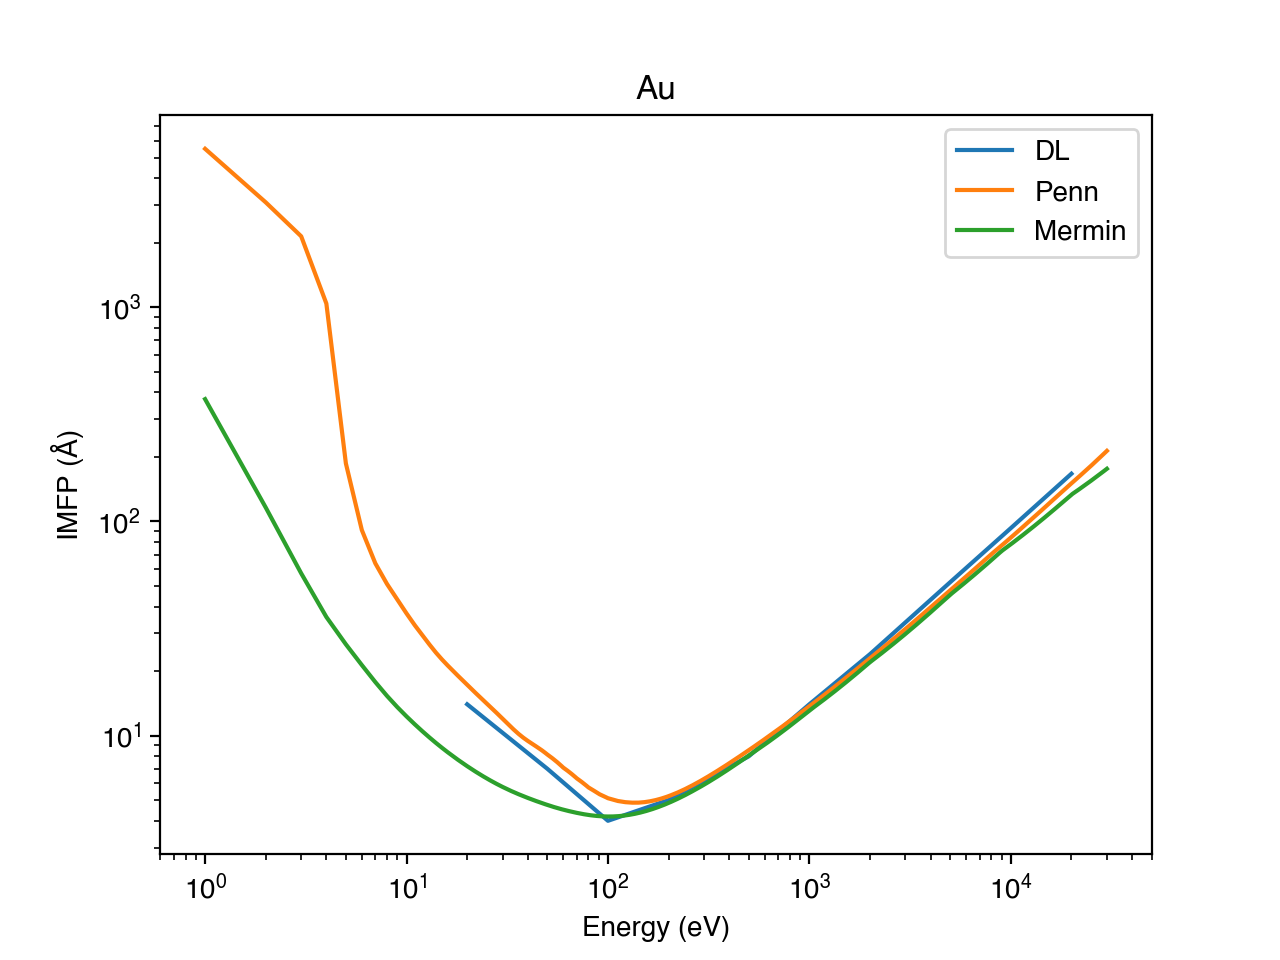

In [92]:
plt.figure()
plt.plot(E0, lin,label='DL')
plt.plot(au_iimfp[:,0],au_iimfp[:,10],label='Penn')
plt.plot(au_iimfp[:,0],au_iimfp[:,2],label='Mermin')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(oscParams.name)
plt.show()